# Task 2 - Customer Segmentation Analysis

The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is to group customers into distinct segments. This segmentation can inform targeted marketing strategies, improve customer satisfaction, and enhance overall business strategies.

<b>Dataset</b> - https://www.kaggle.com/code/analystoleksandra/marketing-analytics-customer-segmentation

<b>Done By</b> - Shweta Alukuru Trikutam


## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Loading and Understanding Dataset

In [2]:
df = pd.read_csv(r"C:\Users\shwet\Downloads\ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [5]:
df.shape

(2205, 39)

### <b> Checking for Missing Values

In [6]:
df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

> No missing or null values present

## 3. Descriptive Statistics

In [8]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


### <b> Calculating Essential Metrics

In [9]:
# Calculate Total Spend per Customer by summing relevant columns
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Display the first few rows to verify
print(df[['TotalSpend']].head())


   TotalSpend
0        1617
1          27
2         776
3          53
4         422


### <b> Calculating Total Purchase Frequency

In [16]:
# Calculate Total Purchase Frequency
df['TotalPurchaseFrequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Display the first few rows to verify
print(df[['TotalPurchaseFrequency']].head())



   TotalPurchaseFrequency
0                      25
1                       6
2                      21
3                       8
4                      19


### <b> Recency </b>

Days since last purchase (Recency) to assess customer engagement

- Low Recency Values: Customers with low recency values (e.g., close to 0) are more recently engaged.
- High Recency Values: Higher recency values indicate that more time has passed since the customer last made a purchase, suggesting lower recent engagement.


In [11]:
# Summary statistics for Recency to assess engagement
recency_stats = df['Recency'].describe()

# Display the summary statistics
print(recency_stats)


count    2205.000000
mean       49.009070
std        28.932111
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


### <b> Customer Spending

In [13]:
# Calculate Total Spend and Average Spend per Category
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
avg_spend_per_category = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

print("Average Spend by Product Category:\n", avg_spend_per_category)


Average Spend by Product Category:
 MntWines            306.164626
MntFruits            26.403175
MntMeatProducts     165.312018
MntFishProducts      37.756463
MntSweetProducts     27.128345
MntGoldProds         44.057143
dtype: float64


> The most popular product whose spend is more is on the `Wines`

### <b> Income and Age Statistics

In [17]:
# Income and Age Statistics
income_stats = df['Income'].describe()
age_stats = df['Age'].describe()
family_stats = df[['Kidhome', 'Teenhome']].mean()

print("Income Statistics:\n", income_stats)
print("Age Statistics:\n", age_stats)
print("Average Family Structure:\n", family_stats)

Income Statistics:
 count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64
Age Statistics:
 count    2205.000000
mean       51.095692
std        11.705801
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64
Average Family Structure:
 Kidhome     0.442177
Teenhome    0.506576
dtype: float64


## 4. EDA

### <b> Univariate Analysis

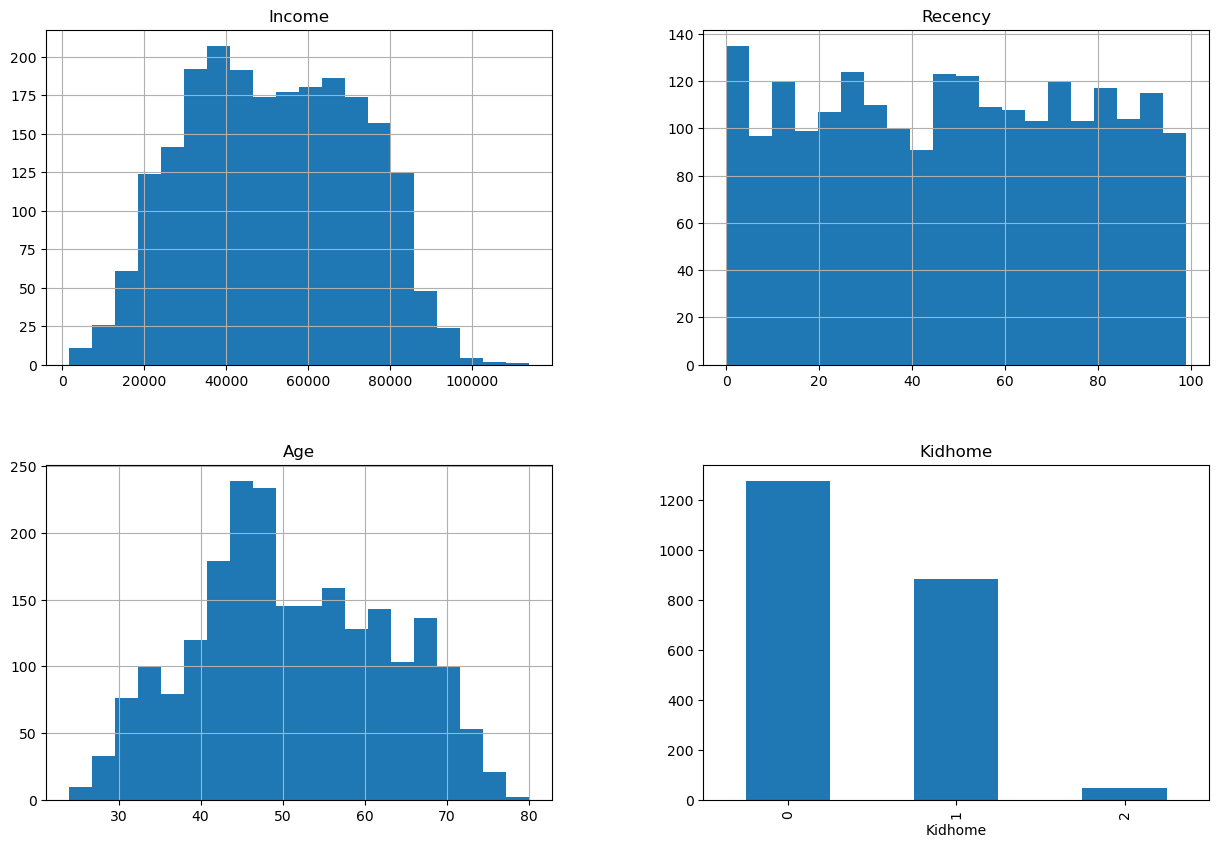

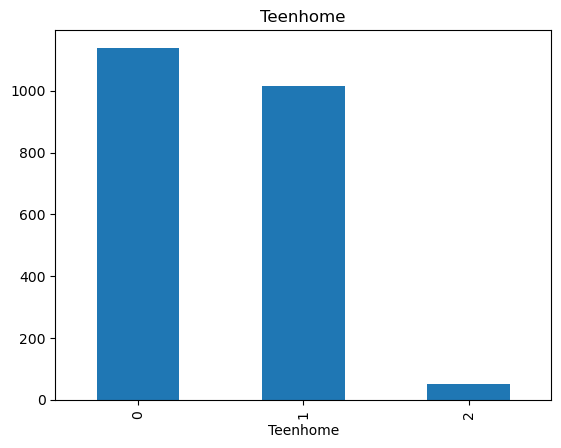

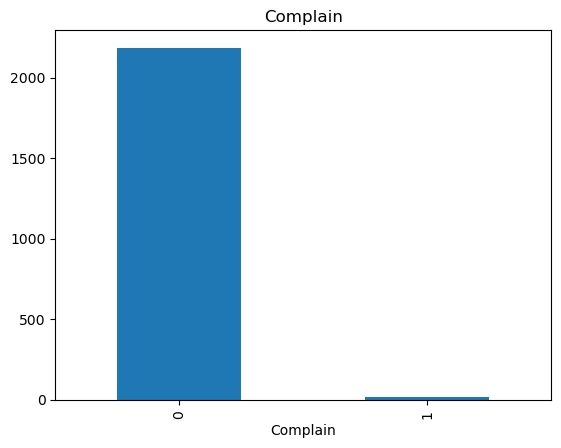

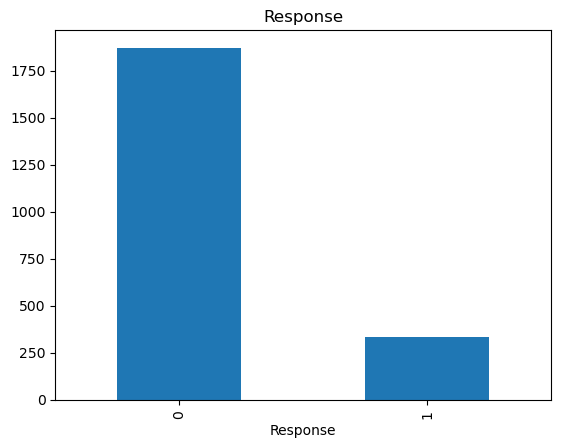

In [18]:
# Histograms for numerical columns
numerical_cols = ['Income', 'Recency', 'Age', 'TotalSpend']
df[numerical_cols].hist(bins=20, figsize=(15, 10))

# Bar plots for categorical columns
categorical_cols = ['Kidhome', 'Teenhome', 'Complain', 'Response']
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()


### <b> Bivariate Analysis

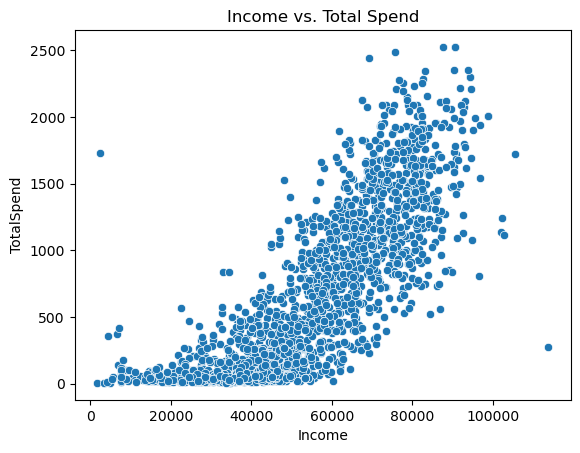

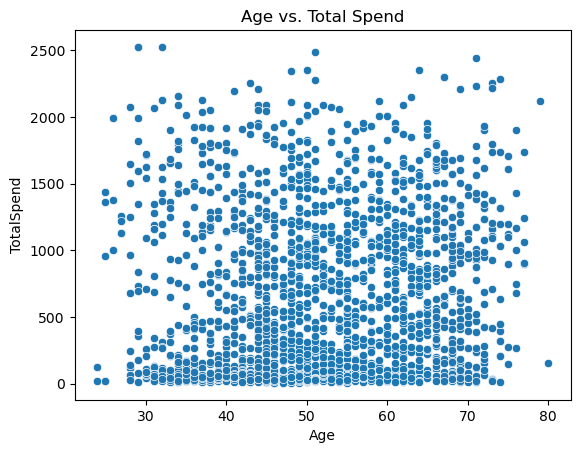

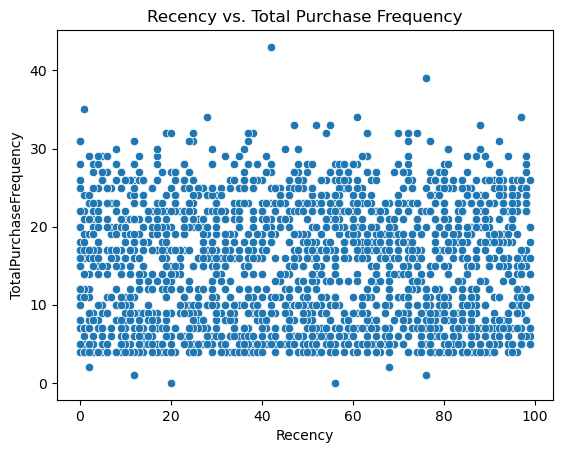

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Income vs. TotalSpend
sns.scatterplot(data=df, x='Income', y='TotalSpend')
plt.title("Income vs. Total Spend")
plt.show()

# Scatter plot for Age vs. TotalSpend
sns.scatterplot(data=df, x='Age', y='TotalSpend')
plt.title("Age vs. Total Spend")
plt.show()

# Recency vs. Purchase Frequency
sns.scatterplot(data=df, x='Recency', y='TotalPurchaseFrequency')
plt.title("Recency vs. Total Purchase Frequency")
plt.show()


### <b> Customer Segmentation

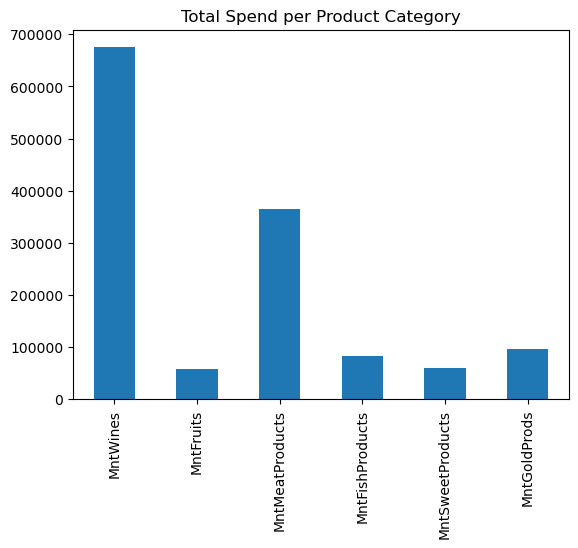

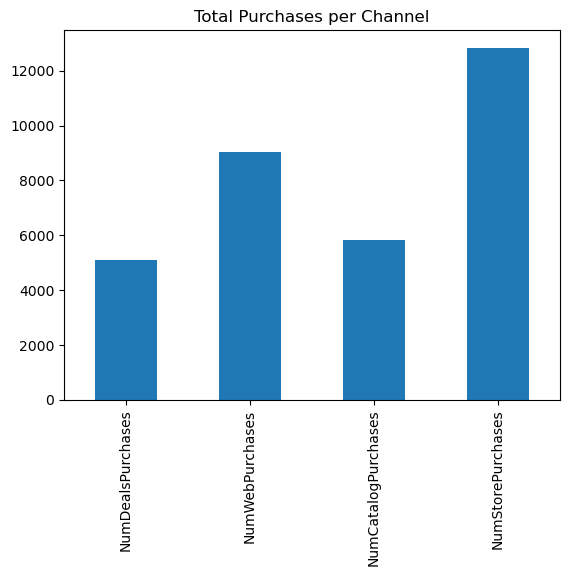

In [20]:
# Sum of each product category
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_sums = df[product_cols].sum()
product_sums.plot(kind='bar', title="Total Spend per Product Category")
plt.show()

# Sum of purchase channels
channel_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_sums = df[channel_cols].sum()
channel_sums.plot(kind='bar', title="Total Purchases per Channel")
plt.show()


### <b> Correlation Analysis

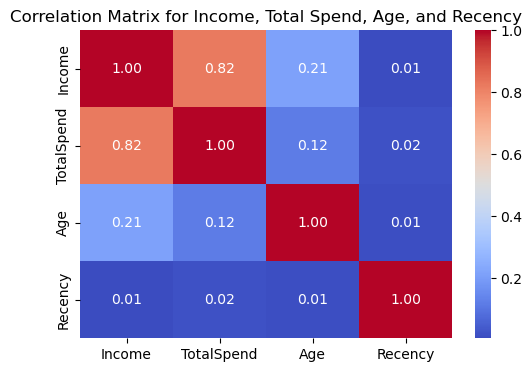

In [22]:
# Select relevant columns
correlation_subset = df[['Income', 'TotalSpend', 'Age', 'Recency']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Income, Total Spend, Age, and Recency")
plt.show()

> High correlation between `Income` and `TotalSpend`

## 5. Feature Engineering

In [23]:
# Calculate total purchase amount and average purchase value
df['TotalPurchase'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['AvgPurchaseValue'] = df['TotalPurchase'] / (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']).replace(0, 1)


## 6. K-Means Clustering

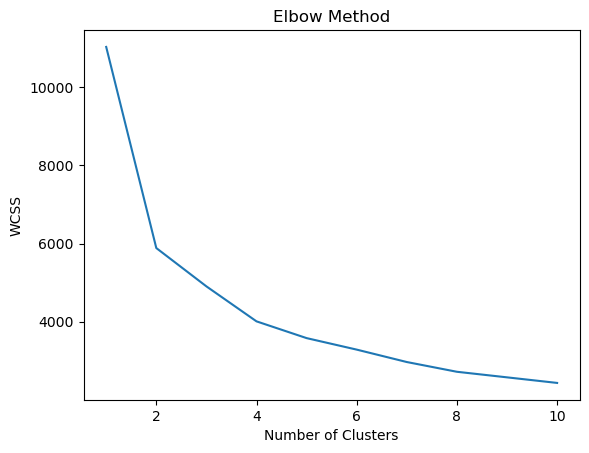

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = df[['Income', 'Recency', 'TotalPurchase', 'AvgPurchaseValue', 'NumWebVisitsMonth']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determining optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means with optimal clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)


## 7. Visualization of Segments

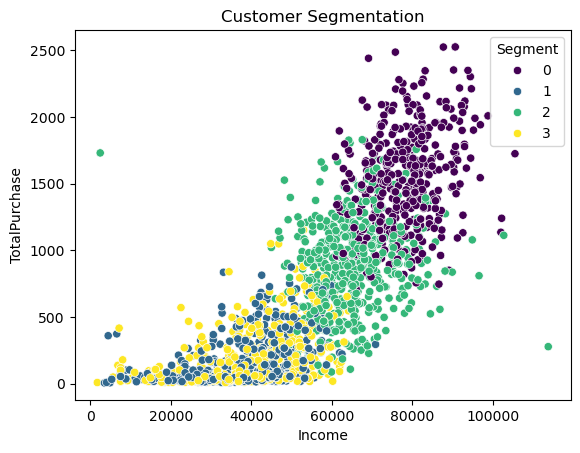

In [25]:
import seaborn as sns

# Visualizing clusters based on income and purchase frequency
sns.scatterplot(data=df, x='Income', y='TotalPurchase', hue='Segment', palette='viridis')
plt.title('Customer Segmentation')
plt.show()


# Insights

- Customers with <b> Higher Income</b> have <b>High Purchases</b>
- More number of customers prefer `Stored Purchases`
- There is a <b>High Expenditure</b> on `Wines`
- There are higher number of cutomers whose `ages` ranges between 40-50 years

# Recommendations

- Target high-income customers with exclusive promotions or premium products, as they are likely to make larger purchases.
- Enhance the in-store experience with loyalty programs, personalized assistance, or exclusive in-store deals. Understanding this preference could also shape inventory planning for popular products in physical stores.
- Emphasize marketing and promotional activities around wine offerings, possibly introducing wine-tasting events or bundles to drive even more engagement from wine enthusiasts.
- Customer Age Range (40-50): This demographic could benefit from targeted campaigns, considering they may be more established and willing to invest in quality. Tailor messaging that resonates with this age group’s preferences and lifestyle.

